<a href="https://colab.research.google.com/github/ferreiraluisa/faculdade/blob/main/luisa102026_lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-e43eth8i
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-e43eth8i
  Created wheel for ColabPlugin: filename=ColabPlugin-blind-cp36-none-any.whl size=12717 sha256=765a767d5b341d514390c4ef3d0addc203c8d4e22cc2b753ed779dbb3c199a76
  Stored in directory: /tmp/pip-ephem-wheel-cache-8rjj3ddj/wheels/87/ae/09/21c6e192181a0472e20ddd1d5212e2cbb113f00ebe14330d0d
Successfully built ColabPlugin
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 362, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 1147 (delta 100), reused 328 (delta 74), pack-reused 785
Receiving objects: 100% (1147/1147), 35.71 MiB | 20.07 MiB/s, done.
Resolving deltas: 100% (554/554), done.


# Memória com FlipFlop

Memória de 4 células de 4 bits cada, ou 4 palavras de 4 bits.

<img src="https://media.cheggcdn.com/media%2F220%2F220dbecf-22d2-4e3c-8c42-e65727d3fc67%2FphpS85ZOX.png" alt="wscad2020" width="700"/> 

Fonte: media.cheggcdn.com

# Memória com Verilog em Alto Nível

![](https://www.chipverify.com/images/verilog/memory.png)

## Declarar uma memória com inicialização de dados

Memória com 32 palavras de 4 bits. Para endereçar 32 palavras precisamos de $2^5$, ou seja, 5 bits de endereço. 

In [ ]:
%%verilog
module memory (input [4:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:31]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 31; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module tb();
reg [4:0] address;
reg [3:0] writedata;
reg clk,memread,memwrite;
wire [3:0] readdata;
integer k;

memory M(address, writedata, memread, memwrite, clk, readdata);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 
initial begin 
$dumpfile("test.vcd");
$dumpvars;
memwrite = 0; memread= 0;
address = 0;
#2
memread = 1;
address = 20;
#2
address = 13;
#2
address = 10;
#2
memread= 0;
#4
writedata =  4;
address = 13;
memread= 1;
#2
memwrite = 1;
#2
memwrite = 0;
writedata =  5;
address = 14;
#2
memwrite = 1;
#2
memwrite = 0;
address = 12;
#2
address = 13;
#2
address = 14;
#2
$writememh("mem.data", tb.M.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



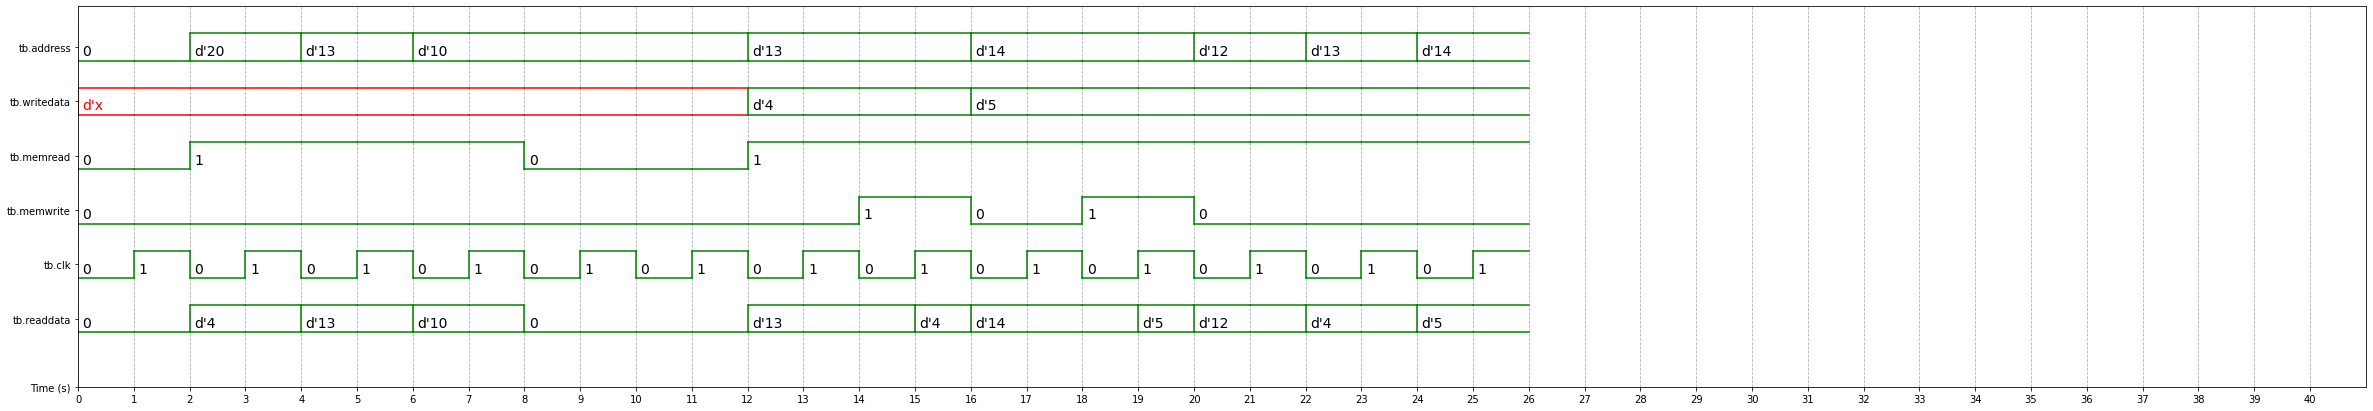

In [ ]:
%%waveform test.vcd

sign_list = ['tb.address', 'tb.writedata', 'tb.memread', 'tb.memwrite', 'tb.clk', 'tb.readdata']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
0
1
2
3
4
5
6
7
8
9
a
b
c
4
5
f


# Exercicio 1

Fazer o modulo de memoria com 64 palavras de 4 bits e escrever seu numero de matricula a partir da posicao do ultimo digito. Por exemplo, minha matricula é 71269. Então a partir da posicao 9 de memória irei 
escrever 7,1,2,6,9....Portanto a memória terá 0,1,2,...,8, **7,1,2,6,9**,e,f,....
Voce irá modificar o testbench do exemplo de memoria para usar o memwrite sincronizado com clk para escrever sua matricula.

In [ ]:
%%verilog
// Completar aqui com o código "..." e com sua matricula para escrever na memoria.
module memory (input [5:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:63]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 63; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module tb();
reg [5:0] address;
reg [3:0] writedata;
reg clk,memread,memwrite;
wire [3:0] readdata;
integer k;

memory M(address, writedata, memread, memwrite, clk, readdata);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 
initial begin 
$dumpfile("test.vcd");
$dumpvars;
memwrite = 0; memread= 0;
address = 0;
#2
writedata = 1;
address = 0;
memread= 1;
#2
memwrite = 1;
#2
memwrite = 0;
writedata = 0;
address = 1;
#2
memwrite = 1;
#2
memwrite = 0;
writedata = 2;
address = 2;
#2
memwrite = 1;
#2
memwrite = 0;
writedata = 0;
address = 3;
#2
memwrite = 1;
#2
memwrite = 0;
writedata = 2;
address = 4;
#2
memwrite = 1;
#2
memwrite = 0;
writedata = 6;
address = 5;
#2
memwrite = 1;
#2
$writememh("mem.data", tb.M.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule

VCD info: dumpfile test.vcd opened for output.



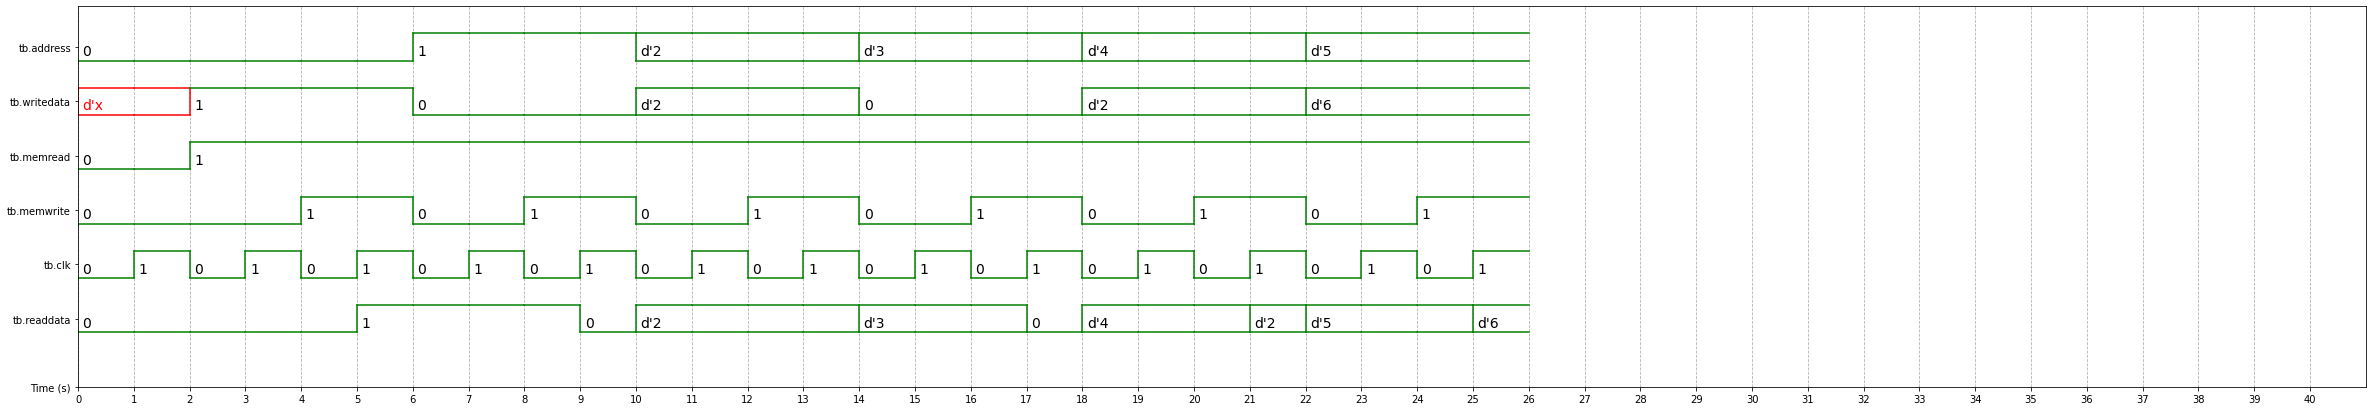

In [ ]:
%%waveform test.vcd

sign_list = ['tb.address', 'tb.writedata', 'tb.memread', 'tb.memwrite', 'tb.clk', 'tb.readdata']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
# imprime a memoria...
!cat mem.data

// 0x00000000
1
0
2
0
2
6
6
7
8
9
a
b
c
d
e
f


# Exemplo com 2 memórias

Este exemplo copia com auxilio de um contador as 16 posicoes da memoria A para a memoria B. A comeca com o conteudo 0,1,2, ... e a Memoria B comeca vazia. 

![](https://raw.githubusercontent.com/arduinoufv/inf150/master/desenhos/TwoMem.png)

In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 


module circuit(input clk, rst,output [3:0] o);
wire [3:0] data;
wire [3:0] cnt;  

counter c(clk, rst, cnt);
memoryA A(cnt, 4'b0000, 1'b1, 1'b0, clk, data);
memoryB B(cnt, data, 1'b1, 1'b1, clk,  o);

endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#20
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



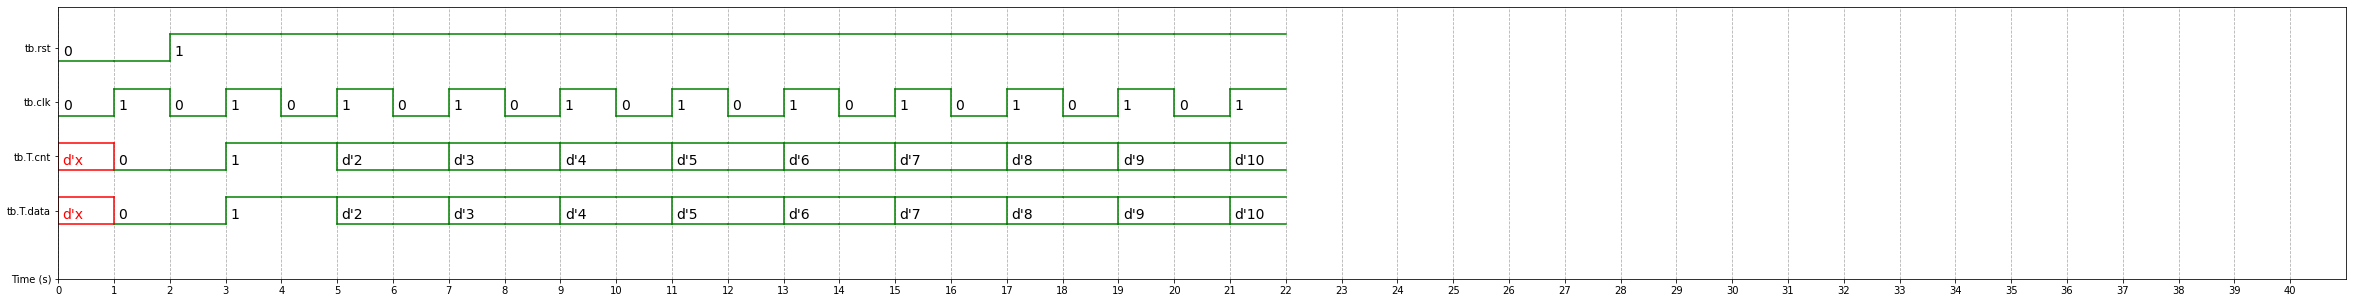

In [ ]:
%%waveform test.vcd

sign_list = ['tb.rst', 'tb.clk', 'tb.T.cnt', 'tb.T.data']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
0
1
2
3
4
5
6
7
8
9
0
0
0
0
0
0


# Exercicio 2

Modifique o conteudo da memoria A com o  seu numero de matricula. Verifique se a memoria B tera o novo valor copiado.

In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    memory[0] = 1;  //minha matricula eh 102026
    memory[1] = 0;
    memory[2] = 2;
    memory[3] = 0;
    memory[4] = 2;
    memory[5] = 6;
    for (i = 6; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 


module circuit(input clk, rst,output [3:0] o);
wire [3:0] data;
wire [3:0] cnt;  

counter c(clk, rst, cnt);
memoryA A(cnt, 4'b0000, 1'b1, 1'b0, clk, data);
memoryB B(cnt, data, 1'b1, 1'b1, clk,  o);

endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#13
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



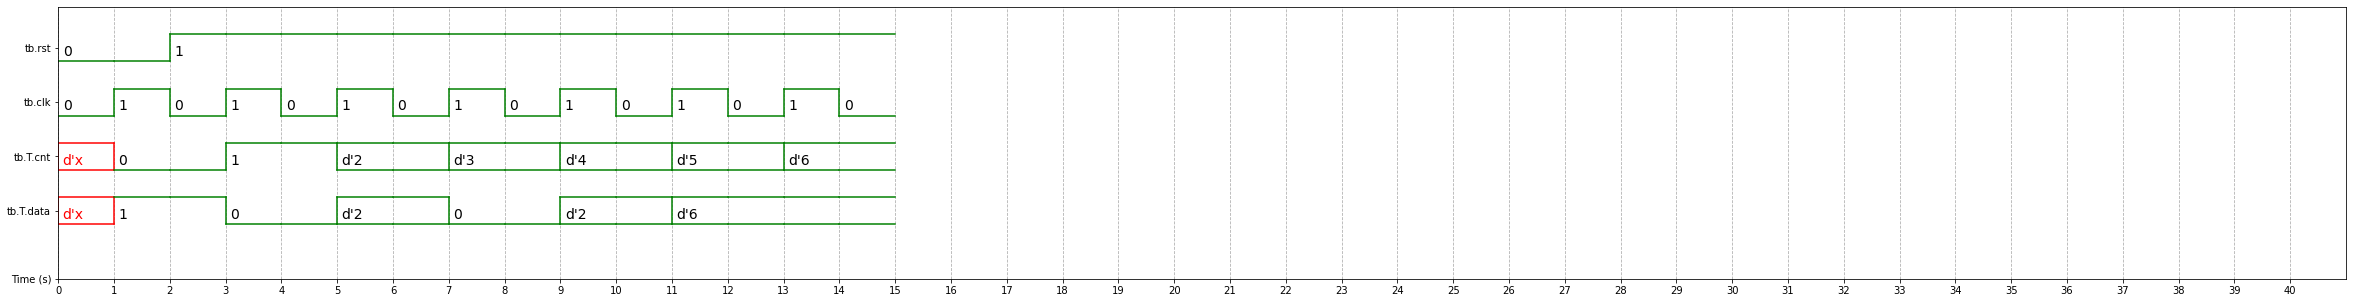

In [ ]:
%%waveform test.vcd

sign_list = ['tb.rst', 'tb.clk', 'tb.T.cnt', 'tb.T.data']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
1
0
2
0
2
6
0
0
0
0
0
0
0
0
0
0


# Registradores e Atrasos

Suponha o mesmo circuito de duas memorias, agora com um registrador adicionado entre as duas memorias.

![](https://raw.githubusercontent.com/arduinoufv/inf150/master/desenhos/MemRegDataMem.png)


In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 

module register(input clk, rst, input [3:0] in, output reg [3:0] out);
  always @(posedge clk) 
  begin
    if ( !rst )
       out<=0;
    else 
       out <= in;   
 	end
endmodule 

module circuit(input clk, rst,output [3:0] o);
wire [3:0] datain,dataout;
wire [3:0] cnt;  

counter c(clk, rst, cnt);
memoryA A(cnt, 1'b0000, 1'b1, 1'b0, clk, datain);
register R(clk,rst,datain,dataout);
memoryB B(cnt, dataout, 1'b1, 1'b1, clk,  o);

endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#20
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



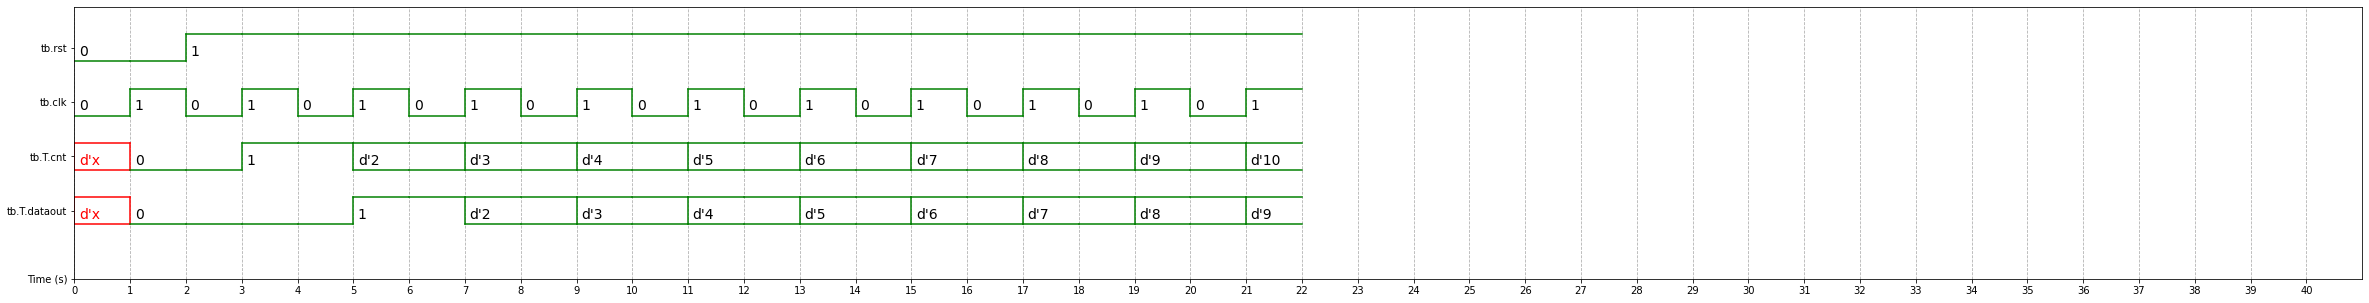

In [ ]:
%%waveform test.vcd

sign_list = ['tb.rst', 'tb.clk', 'tb.T.cnt', 'tb.T.dataout']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
0
0
1
2
3
4
5
6
7
8
0
0
0
0
0
0


# Exercicio 3 - Atrasos no endereco e nos Dados

Faça a montagem abaixo, onde alem do registrador entre a transferencia de dados, existe tres registradores em linha na entrada de endereço da memoria B.

![](https://raw.githubusercontent.com/arduinoufv/inf150/master/desenhos/MemRegDataAddressMem.png)



In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 

module register(input clk, rst, input [3:0] in, output reg [3:0] out);
  always @(posedge clk) 
  begin
    if ( !rst )
       out<=0;
    else 
       out <= in;   
 	end
endmodule 

module circuit(input clk, rst,output [3:0] o);
wire [3:0] datain,dataout;
wire [3:0] cnt; 
wire [3:0] cnt1,cnt2,cnt3;


// COMPLETE AQUI ****

counter c(clk, rst, cnt);
memoryA A(cnt, 4'b0000, 1'b1, 1'b0, clk, datain);
register R(clk,rst,datain,dataout);
register R1(clk,rst,cnt,cnt1);
register R2(clk,rst,cnt1,cnt2);
register R3(clk,rst,cnt2,cnt3);
memoryB B(cnt3, dataout, 1'b1, 1'b1, clk,  o);

endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#20
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



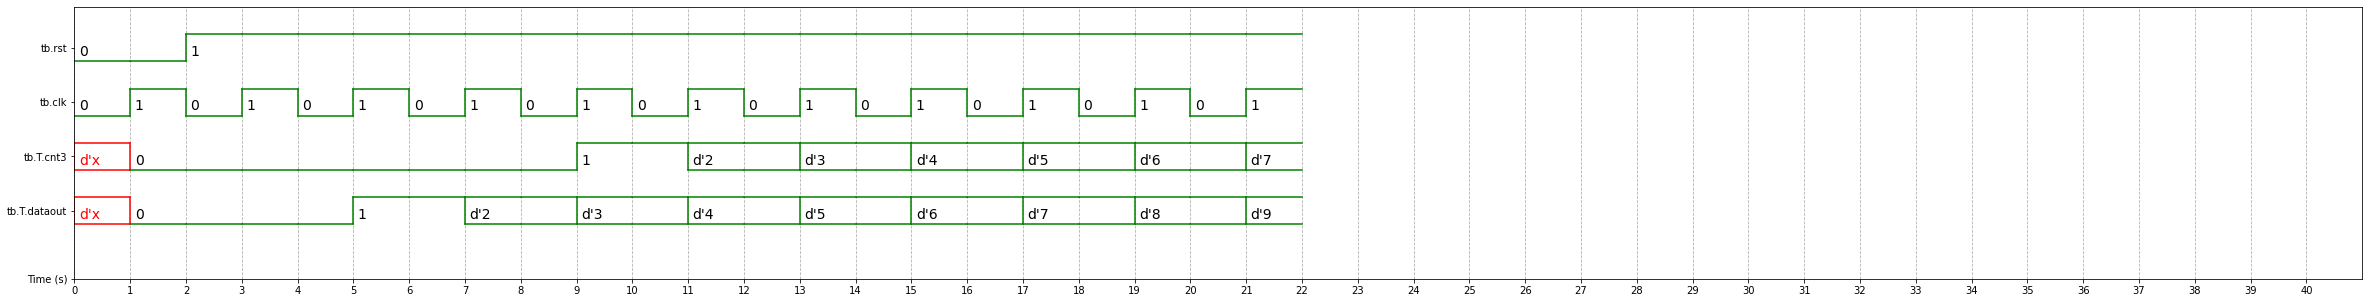

In [ ]:
%%waveform test.vcd

sign_list = ['tb.rst', 'tb.clk', 'tb.T.cnt3', 'tb.T.dataout']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
2
3
4
5
6
7
8
0
0
0
0
0
0
0
0
0


# Contador Decrescente 

O proximo circuito, conecta as duas memorias para copiar de A para B, porem o endereco de B esta sendo controlado por um outro contador. Este contador eh decrescente. 

![](https://raw.githubusercontent.com/arduinoufv/inf150/master/desenhos/MemTwoCounter.png)

In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 


module counter_d(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=4'd15;
    else 
       cnt <= cnt - 1;   
 	end
endmodule 


module circuit(input clk, rst,output [3:0] o);
wire [3:0] data;
wire [3:0] cnt,cnt1; 

counter c(clk, rst, cnt);
counter_d c1(clk, rst, cnt1);
memoryA A(cnt, 1'b0000, 1'b1, 1'b0, clk, data);
memoryB B(cnt1, data, 1'b1, 1'b1, clk,  o);

endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#20
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



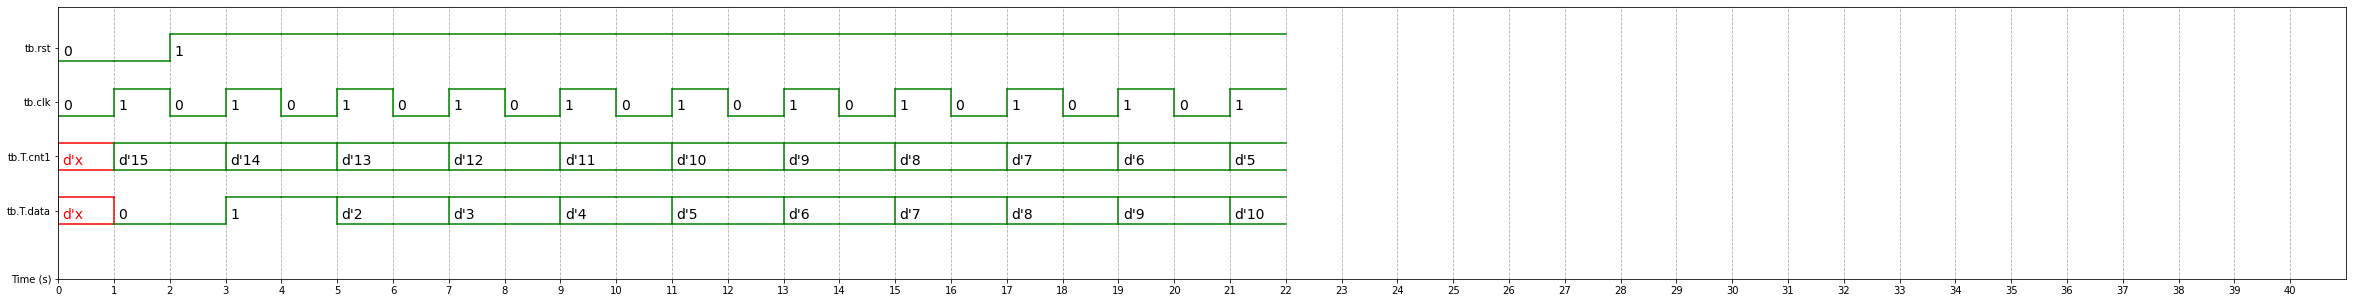

In [ ]:
%%waveform test.vcd

sign_list = ['tb.rst', 'tb.clk', 'tb.T.cnt1', 'tb.T.data']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
0
0
0
0
0
0
9
8
7
6
5
4
3
2
1
0


# Exercicio 4

Troque os contadores, agora a memoria A tera o contador decrescente e a B o contador crescente. Alem disso, o CLK da memoria B ira passar por um FlipFlop T com a entrada em 1. 

![](https://raw.githubusercontent.com/arduinoufv/inf150/master/desenhos/MemTwoCounter_FF_T.png)

In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 


module counter_d(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=4'd15;
    else 
       cnt <= cnt - 1;   
 	end
endmodule 

module FF_T(input clk, rst, T, output reg  q);
  always @(posedge clk) 
  begin
    if ( !rst )
       q<=0;
    else if ( T )
       q <= ~q;
    else 
       q<= q;      
 	end
endmodule 

// COMPLETE AQUI *******

module circuit(input clk, rst,output [3:0] o);
wire [3:0] data;
wire [3:0] cnt,cnt1; 
wire q;

counter_d c(clk, rst, cnt);
counter c1(clk, rst, cnt1);
FF_T T(clk,rst,clk,q);
memoryA A(cnt, 4'b0000, 1'b1, 1'b0, clk, data);
memoryB B(cnt1, data , 1'b1, 1'b1, q,  o);

endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#20
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



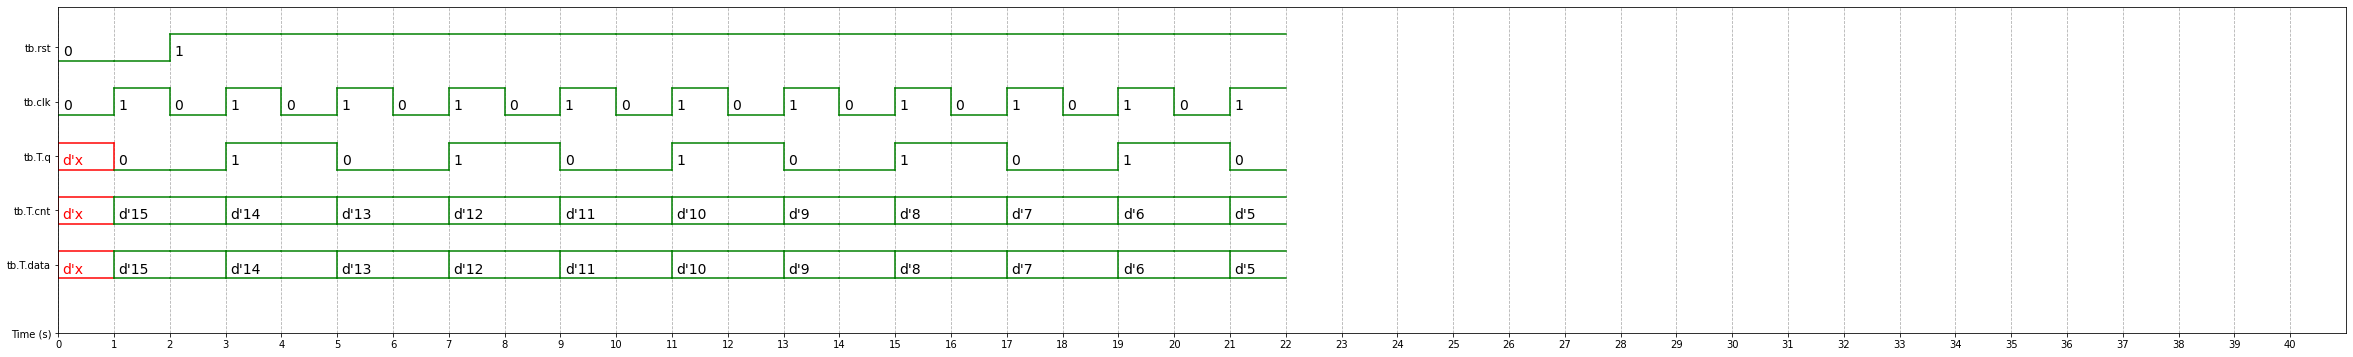

In [ ]:
%%waveform test.vcd

sign_list = ['tb.rst', 'tb.clk', 'tb.T.q',  'tb.T.cnt', 'tb.T.data']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
0
e
0
c
0
a
0
8
0
6
0
0
0
0
0
0


# Uma memoria indexando a outra

O circuito abaixo,  a saida de dados da Mem A esta conectada a entrada de endereco da memoria B, que recebe o conteudo da Mem C.

<img src="https://raw.githubusercontent.com/arduinoufv/inf150/master/desenhos/ThreeMemPointer.png" alt="wscad2020" width="400"/> 



In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 





module circuit(input clk, rst,output [3:0] o);
wire [3:0] data,data_1;
wire [3:0] cnt; 

counter c(clk, rst, cnt);
memoryA A(cnt, 4'b0000, 1'b1, 1'b0, clk, data);
memoryB B(data, data_1, 1'b1, 1'b1, clk,  o);
memoryA C(cnt, 4'b0000, 1'b1, 1'b0, clk, data_1);
endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#20
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



In [ ]:
!cat mem.data

// 0x00000000
0
1
2
3
4
5
6
7
8
9
0
0
0
0
0
0


# Exercicio 5

Altere o conteúdo das memórias A e C para escrever sua matricula na memória B.

In [ ]:
%%verilog
module memoryA (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin

    for (i = 0; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 

module memoryC(input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);
  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    memory[0] = 1;
    memory[1] = 0;
    memory[2] = 2;
    memory[3] = 0;
    memory[4] = 2;
    memory[5] = 6;
    for (i = 6; i <= 15; i++) 
      memory[i] <= i;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule



module circuit(input clk, rst,output [3:0] o);
wire [3:0] data,data_1;
wire [3:0] cnt; 

counter c(clk, rst, cnt);
memoryA A(cnt, 4'b0000, 1'b1, 1'b0, clk, data);
memoryB B(data, data_1, 1'b1, 1'b1, clk,  o);
memoryC C(cnt, 4'b0000, 1'b1, 1'b0, clk, data_1);
endmodule

module tb();
reg clk,rst;
wire [3:0] o;
integer k;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#13
$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule


VCD info: dumpfile test.vcd opened for output.



In [ ]:
!cat mem.data

// 0x00000000
1
0
2
0
2
6
0
0
0
0
0
0
0
0
0
0


# <center> Lendo o conteudo da memoria de um Arquivo </center>

In [ ]:
%%writefile data.txt
0
2
1
3
4
5
6
7
8
9
A
B
C
D
E
F

Overwriting data.txt


In [ ]:
%%writefile data_C.txt
0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F

Overwriting data_C.txt


In [ ]:
%%verilog
module memoryA #(parameter DATA = "data.txt", NMEM = 16)(input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);
  
  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  // fill the memory  
	initial begin
		$readmemh(DATA, memory, 0, NMEM-1);
	end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule


module memoryB (input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);

  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  
  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++) 
      memory[i] <= 0;
  end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) 
  begin
    if ( !rst )
       cnt<=0;
    else 
       cnt <= cnt +1;   
 	end
endmodule 


module tb();
reg clk,rst;
wire [3:0] o;
integer k;
parameter NMEM = 16;  // number in instruction memory
parameter DATA = "data.txt";

wire [3:0] data,data_1;
wire [3:0] cnt; 

counter c(clk, rst, cnt);

memoryA  #("data.txt",16) A (cnt, 4'b0000, 1'b1, 1'b0, clk, data);
memoryB B(data, data_1, 1'b1, 1'b1, clk,  o);
memoryA #("data_C.txt",16) C(cnt, 4'b0000, 1'b1, 1'b0, clk, data_1);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#20
$writememh("mem.data", tb.B.memory, 0, 15);
$dumpoff;
$finish;
end 
endmodule

VCD info: dumpfile test.vcd opened for output.



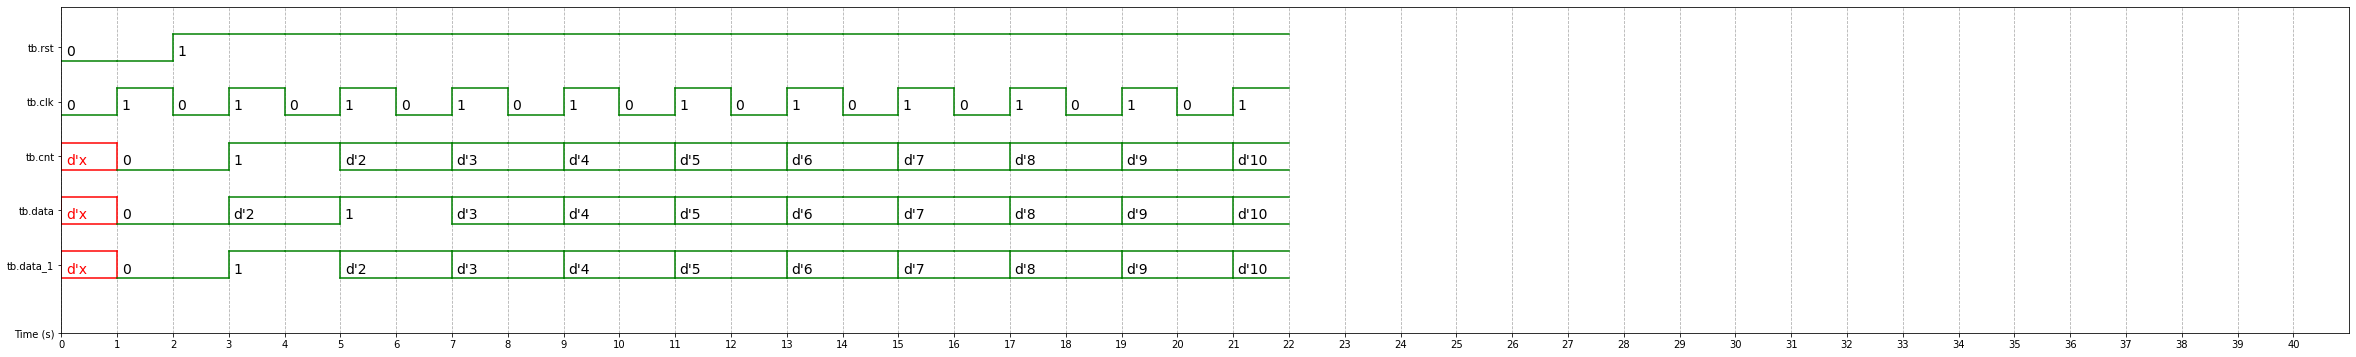

In [ ]:
%%waveform test.vcd

sign_list = ['tb.rst', 'tb.clk', 'tb.cnt',  'tb.data', 'tb.data_1']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

In [ ]:
!cat mem.data

// 0x00000000
0
2
1
3
4
5
6
7
8
9
0
0
0
0
0
0


# Memoria:  contador de bits

Podemos implementar uma função em memória como uma tabela verdade. Um exemplo seria contar quantos bits 1 tem em uma palavra binario.

X | cnt
---|---
0000| 0
0001| 1
0010| 1
0011| 2
0100| 1
0101| 2
0110| 2
0111| 3
....|...



In [ ]:
%%writefile data.txt
0
1
1
2
1
2
2
3
1
2
2
3
2
3
3
4

Overwriting data.txt


In [ ]:
%%verilog
module memoryA #(parameter DATA = "data.txt", NMEM = 16)(input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);
  
  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  // fill the memory  
	initial begin
		$readmemh(DATA, memory, 0, NMEM-1);
	end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule



module tb();
reg clk;
wire [3:0] o;

reg [3:0] cnt; 


memoryA  #("data.txt",16) A (cnt, 4'b0000, 1'b1, 1'b0, clk, o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
cnt = 4;
#2
cnt = 4;
#2
cnt = 12;
#2
cnt = 9;
#2
cnt = 7;
#2
$dumpoff;
$finish;
end 
endmodule

VCD info: dumpfile test.vcd opened for output.



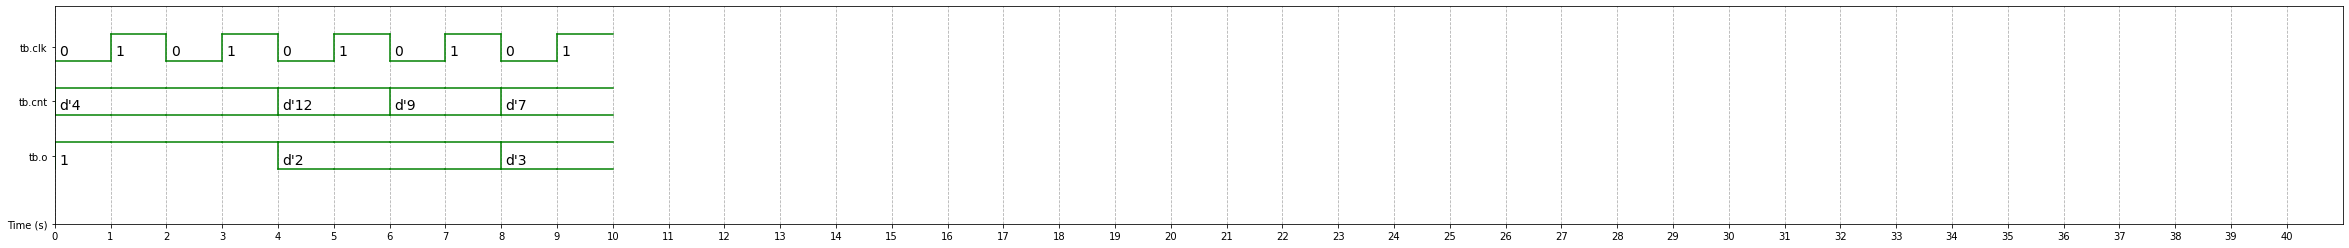

In [ ]:
%%waveform test.vcd

sign_list = ['tb.clk', 'tb.cnt',  'tb.o']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal

# Exercicio 6

Implementar a função raiz quadrada semelhante ao contador de bits.

X    |  raiz quadrada |
--- | ---
0000 | 0
0001 | 1
0010 | 2
0011 | 2
0100 | 2
0101 | 2
0110 | 2
0111 | 2
1000 | 2
1001 | 3
1010 | 3
1011 | 3
1100 | 3  
1101 | 3  
1110 | 3  
1111 | 3



In [ ]:
%%writefile data.txt
0
1
2
2
2
2
2
2
2
3
3
3
3
3
3
3

Overwriting data.txt


In [ ]:
%%verilog
module memoryA #(parameter DATA = "data.txt", NMEM = 16)(input [3:0] addr, input [3:0] writedata, input memread, memwrite, clk, output [3:0] readdata);
  
  integer i;
  reg [3:0] memory [0:15]; // *** MEMORY ***
  // fill the memory  
	initial begin
		$readmemh(DATA, memory, 0, NMEM-1);
	end
// READ
  assign readdata = (memread) ? memory[addr] : 0;
// WRITE
  always @(posedge clk) begin
    if (memwrite)
      memory[addr] <= writedata;
	end
endmodule



module tb();
reg clk;
wire [3:0] o;

reg [3:0] cnt; 


memoryA  #("data.txt",16) A (cnt, 4'b0000, 1'b1, 1'b0, clk, o);

initial begin
  clk=0;
     forever #1 clk = ~clk;  
end 

initial begin 
$dumpfile("test.vcd");
$dumpvars;
cnt = 4;
#2
cnt = 4;
#2
cnt = 12;
#2
cnt = 9;
#2
cnt = 7;
#2
$dumpoff;
$finish;
end 
endmodule

VCD info: dumpfile test.vcd opened for output.



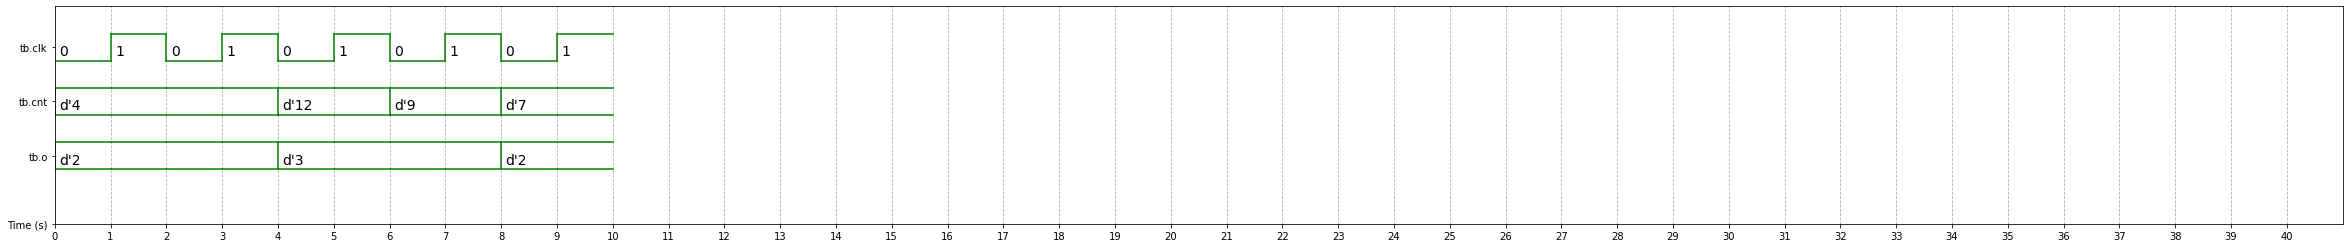

In [ ]:
%%waveform test.vcd

sign_list = ['tb.clk', 'tb.cnt',  'tb.o']
time_begin = 0
time_end = 40 
base = 'dec' # bin, dec, dec2, hex, octal